<a href="https://colab.research.google.com/github/AnastasiaBrinati/experiments/blob/main/EndpointStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistiche degli endpoints

#### import

In [36]:
# Use seaborn for pairplot.
!pip install datasets

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
from datasets import load_dataset
data = load_dataset("anastasiafrosted/endpoint_stats", download_mode="force_redownload")
df = pd.DataFrame(data['train'])

endpoint_stats.csv:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/313 [00:00<?, ? examples/s]

In [39]:
df.head()

endpoint_uuid  n_tasks  n_users  n_functions  \
0  fc1d7a40-6293-758c-2158-b7986a2089d6   575304        1        98896   
1  b1e0ed9d-91b9-8f22-1fb0-a9239b843d4d   212391        1         3003   
2  b0016b02-ef05-e6fa-659e-b6810fc9653b   132860        2           72   
3  981c92a0-1480-e5b1-1432-0620dc90b7f8   110450        2       110450   
4  9b1d9849-dd78-51bb-cb47-c48ebc5ef9c9    63048        1           32   

   first_function_call   last_function_call  function_rate_per_minute  
0  2023-01-22 20:23:23  2023-07-03 01:59:57                  2.478513  
1  2023-01-20 06:45:26  2023-07-03 01:59:47                  0.900670  
2  2022-12-20 05:30:44  2023-06-28 20:33:08                  0.484109  
3  2023-01-05 21:46:10  2023-06-11 20:17:16                  0.488866  
4  2023-06-13 05:46:25  2023-06-14 18:01:27                 28.987142

### NUMERO DI INVOCAZIONI (TASKS) PER ENDPOINT

In [40]:
tot_end = len(df)
print("Numero totale di endpoint: ")
print(tot_end)
poche_invoc = len(df[df['n_tasks'] < 50])
print("Quanti endpoint eseguono meno di 50 task?")
print(poche_invoc)
tante_invoc = len(df[df['n_tasks'] > 1000])
print("Quanti endpoint eseguono più di 1000 task?")
print(tante_invoc)

Numero totale di endpoint: 
313
Quanti endpoint eseguono meno di 50 task?
220
Quanti endpoint eseguono più di 1000 task?
31


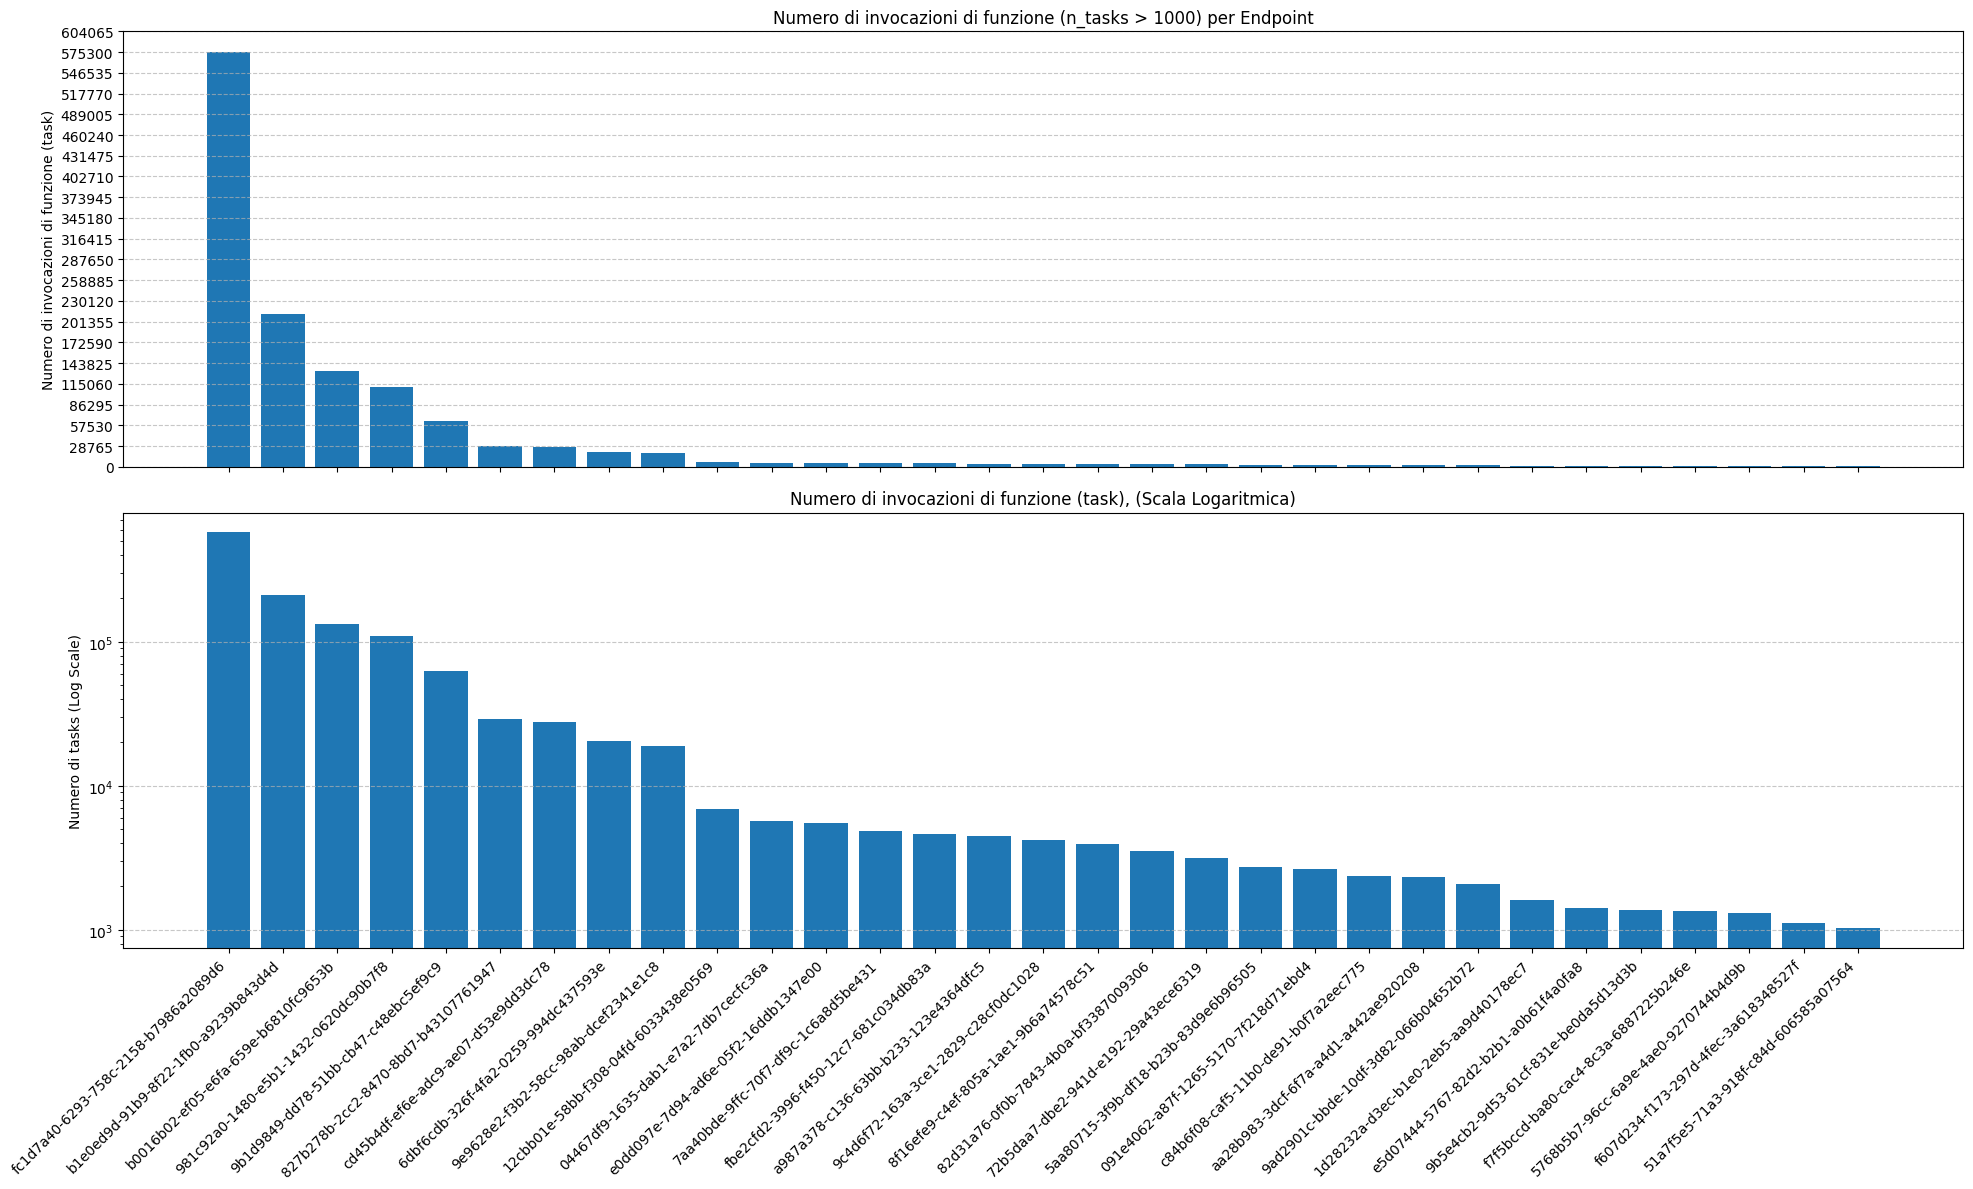

In [41]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_tasks'] > 1000]

# Creare una figura con due sottotrame
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Primo grafico: asse Y lineare
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[0].set_ylabel('Numero di invocazioni di funzione (task)')
axes[0].set_title('Numero di invocazioni di funzione (n_tasks > 1000) per Endpoint')
y_max = filtered_df['n_tasks'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
axes[0].set_yticks(np.arange(0, y_max + tick_step, tick_step))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Secondo grafico: asse Y in scala logaritmica
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[1].set_ylabel('Numero di tasks (Log Scale)')
axes[1].set_yscale('log')
axes[1].set_title('Numero di invocazioni di funzione (task), (Scala Logaritmica)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=45, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### NUMERO DI FUNZIONI DISTINTE PER ENDPOINT

In [42]:
quante_func = len(df[df['n_functions'] < 1])
print("Quanti endpoint eseguono solo una funzione?")
print(quante_func)
quante_func = len(df[df['n_functions'] > 50])
print("Quanti endpoint eseguono più di 50 funzioni?")
print(quante_func)

Quanti endpoint eseguono solo una funzione?
0
Quanti endpoint eseguono più di 50 funzioni?
39


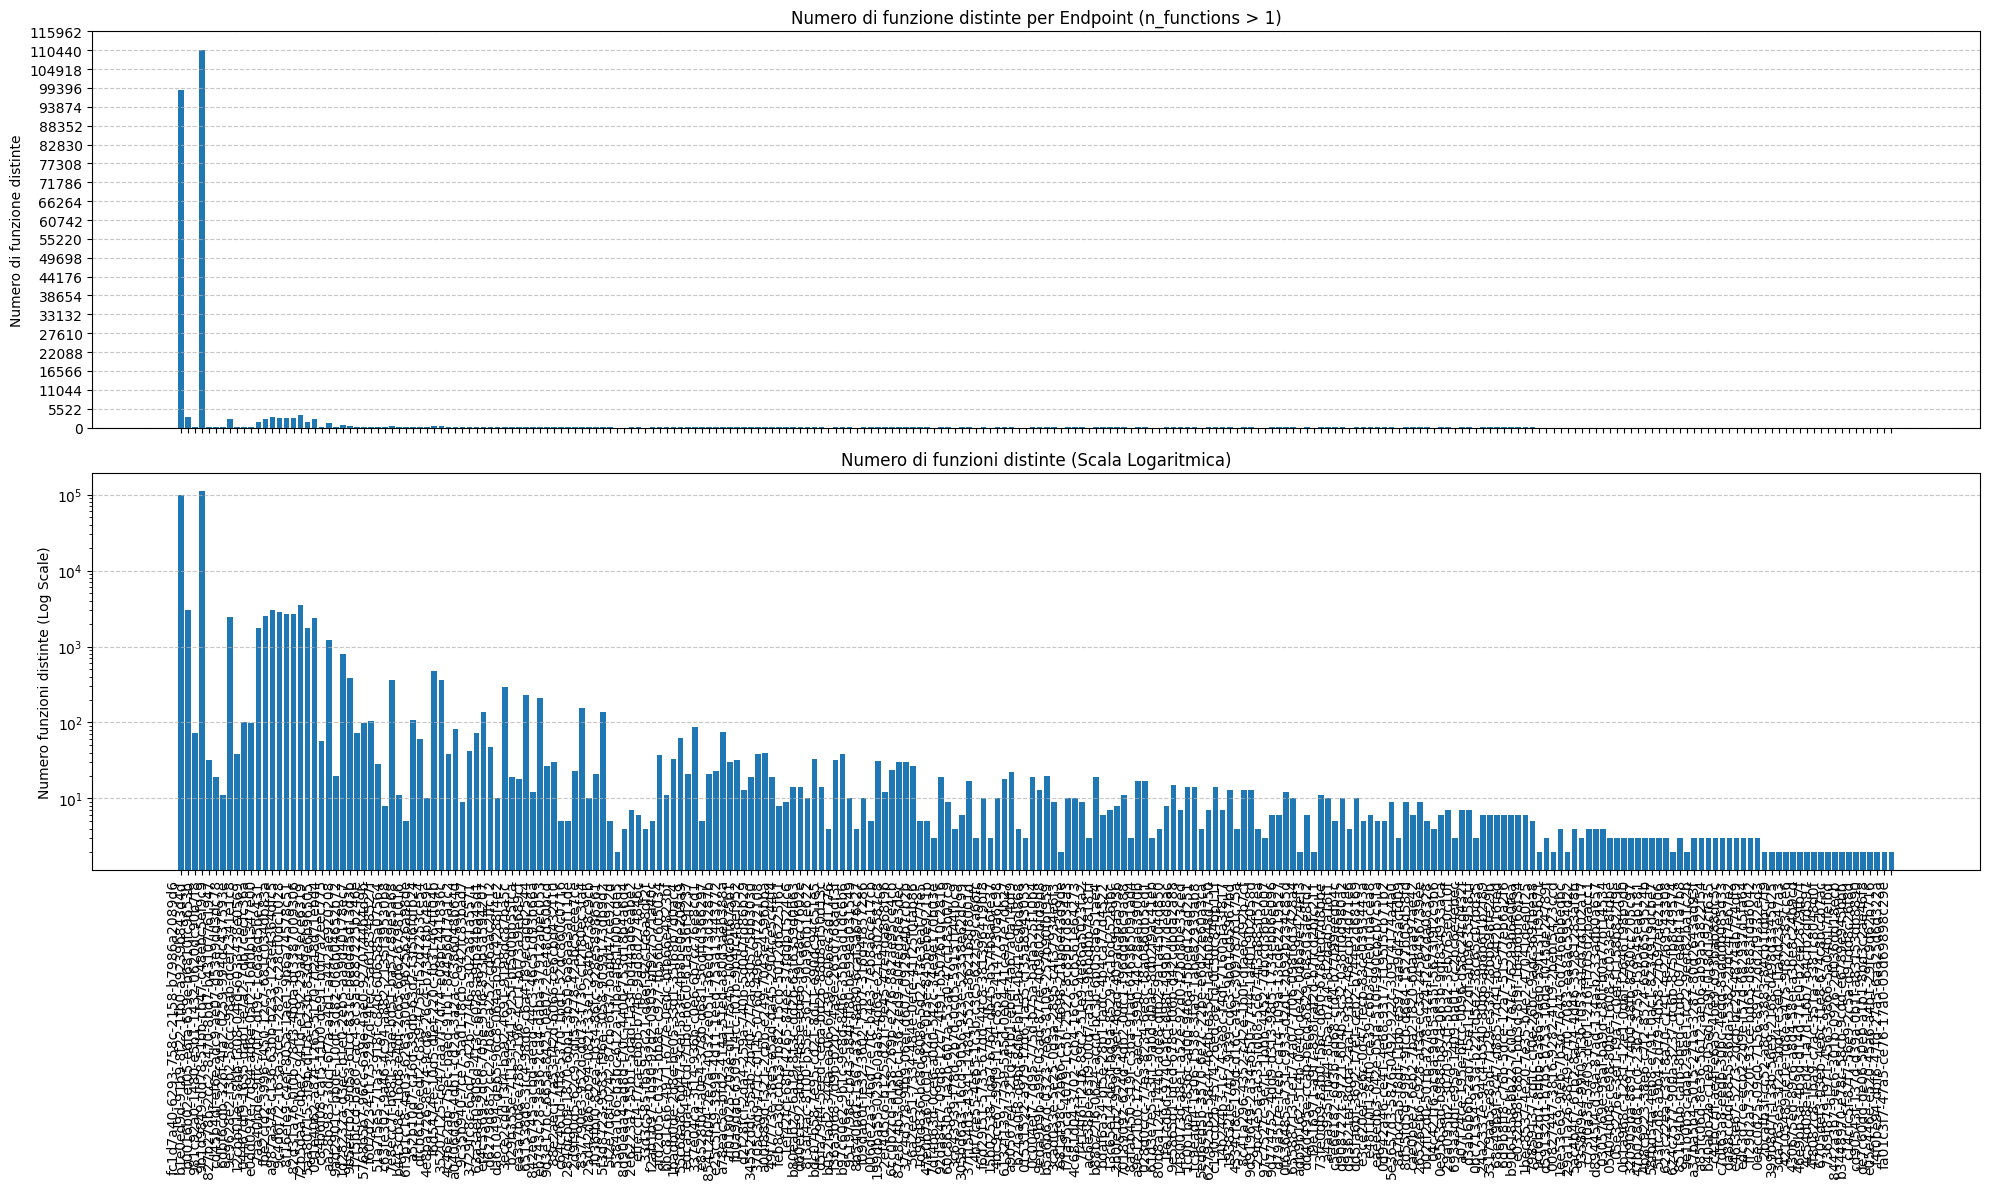

In [43]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_functions'] > 1]

# Creare una figura con due sottotrame
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Primo grafico: asse Y lineare
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'])
axes[0].set_ylabel('Numero di funzione distinte')
axes[0].set_title('Numero di funzione distinte per Endpoint (n_functions > 1)')
y_max = filtered_df['n_functions'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
axes[0].set_yticks(np.arange(0, y_max + tick_step, tick_step))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Secondo grafico: asse Y in scala logaritmica
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'])
axes[1].set_ylabel('Numero funzioni distinte (Log Scale)')
axes[1].set_yscale('log')
axes[1].set_title('Numero di funzioni distinte (Scala Logaritmica)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=90, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### CONFRONTO INVOCAZIONI DI FUNZIONE (TASKS) E FUNZIONI DISTINTE (FUNCTIONS)

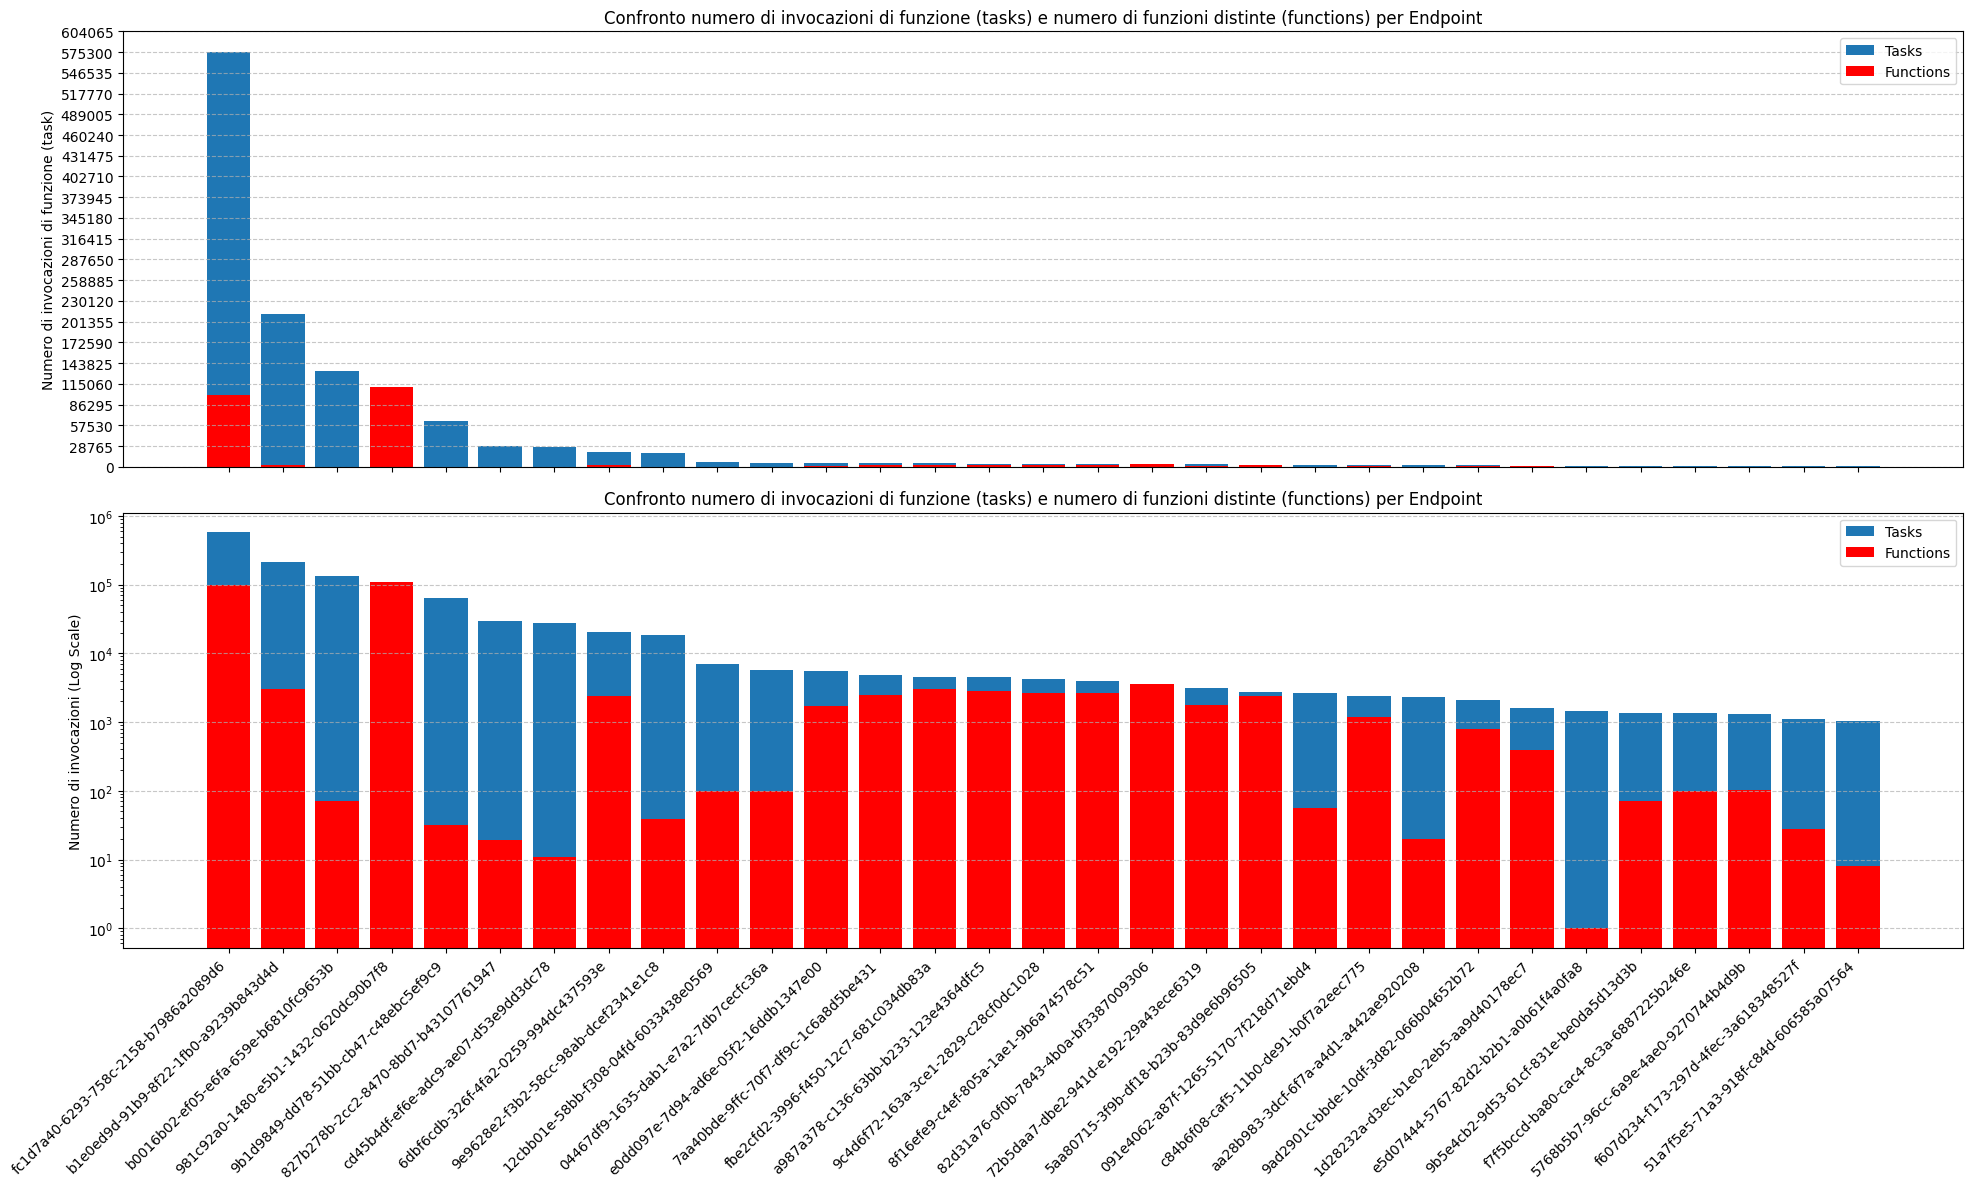

In [44]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_tasks'] > 1000]

# Creare una figura con due sottotrame
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Primo grafico: asse Y lineare
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[0].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'], color='red')
axes[0].set_ylabel('Numero di invocazioni di funzione (task)')
axes[0].set_title('Confronto numero di invocazioni di funzione (tasks) e numero di funzioni distinte (functions) per Endpoint')
axes[0].legend(['Tasks', 'Functions'])
y_max = filtered_df['n_tasks'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
axes[0].set_yticks(np.arange(0, y_max + tick_step, tick_step))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Secondo grafico: asse Y in scala logaritmica
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_tasks'])
axes[1].bar(filtered_df['endpoint_uuid'], filtered_df['n_functions'], color='red')
axes[1].set_ylabel('Numero di invocazioni (Log Scale)')
axes[1].set_yscale('log')
axes[1].set_title('Confronto numero di invocazioni di funzione (tasks) e numero di funzioni distinte (functions) per Endpoint')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(['Tasks', 'Functions'])

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=45, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### NUMERO DI UTENTI PER ENDPOINT

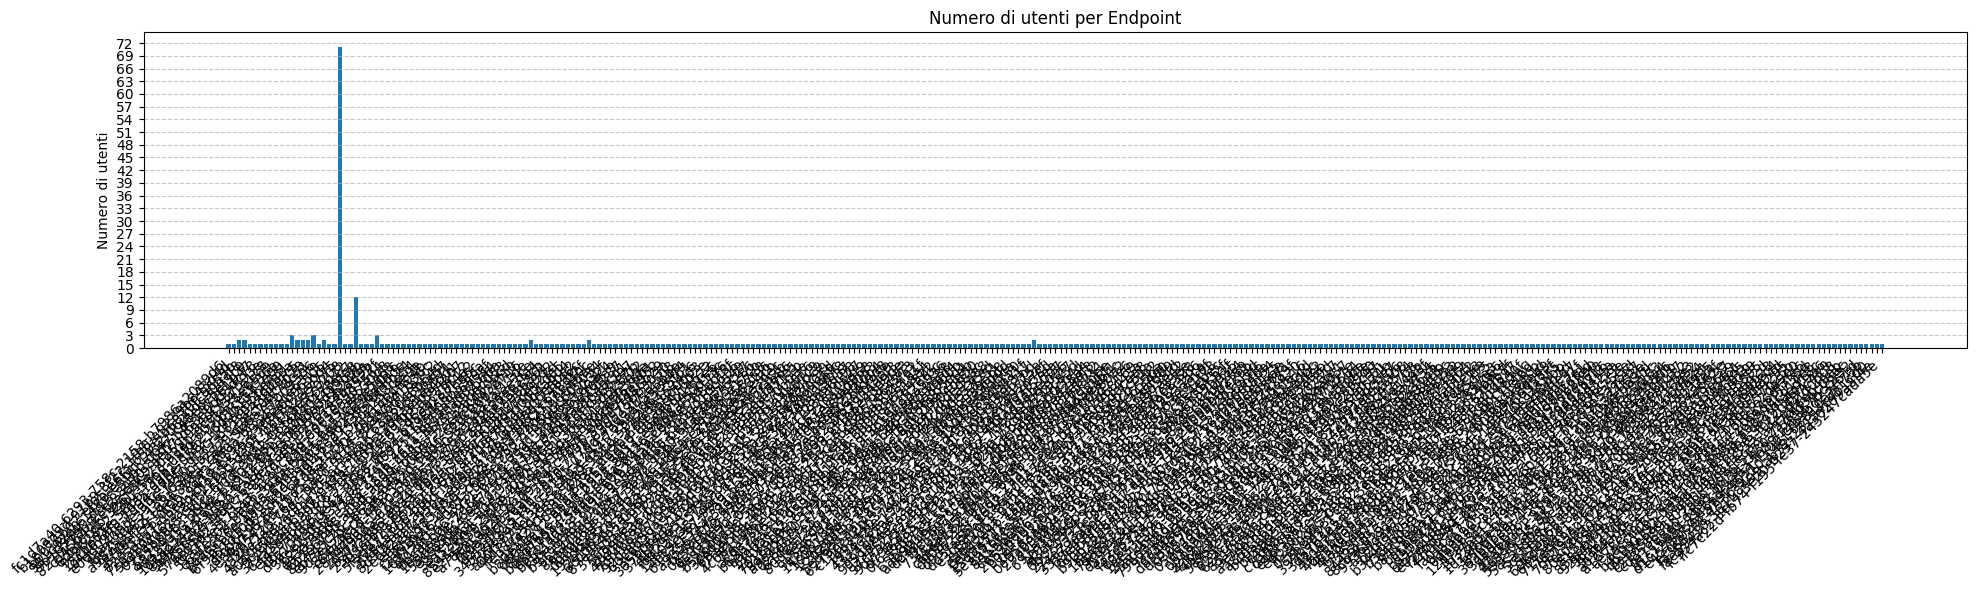

In [45]:
# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
#filtered_df = df[df['n_functions'] > 50]

# Creare una figura con due sottotrame
plt.figure(figsize=(20, 6))

# Primo grafico: asse Y lineare
plt.bar(df['endpoint_uuid'], df['n_users'])
plt.ylabel('Numero di utenti')
plt.title('Numero di utenti per Endpoint')
y_max = df['n_users'].max()
tick_step = y_max // 20  # Raddoppiare rispetto a 10 tick
plt.yticks(np.arange(0, y_max + tick_step, tick_step))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ruotare le etichette dell'asse X per entrambi i grafici
plt.xticks(rotation=45, ha='right')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

### ATTIVITa' TEMPORALE ENDPOINT

<ipython-input-46-db8897bfa6e0>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['first_function_call'] = pd.to_datetime(filtered_df['first_function_call'])
<ipython-input-46-db8897bfa6e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['first_function_call'] = pd.to_datetime(filtered_df['first_function_call'])
<ipython-input-46-db8897bfa6e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

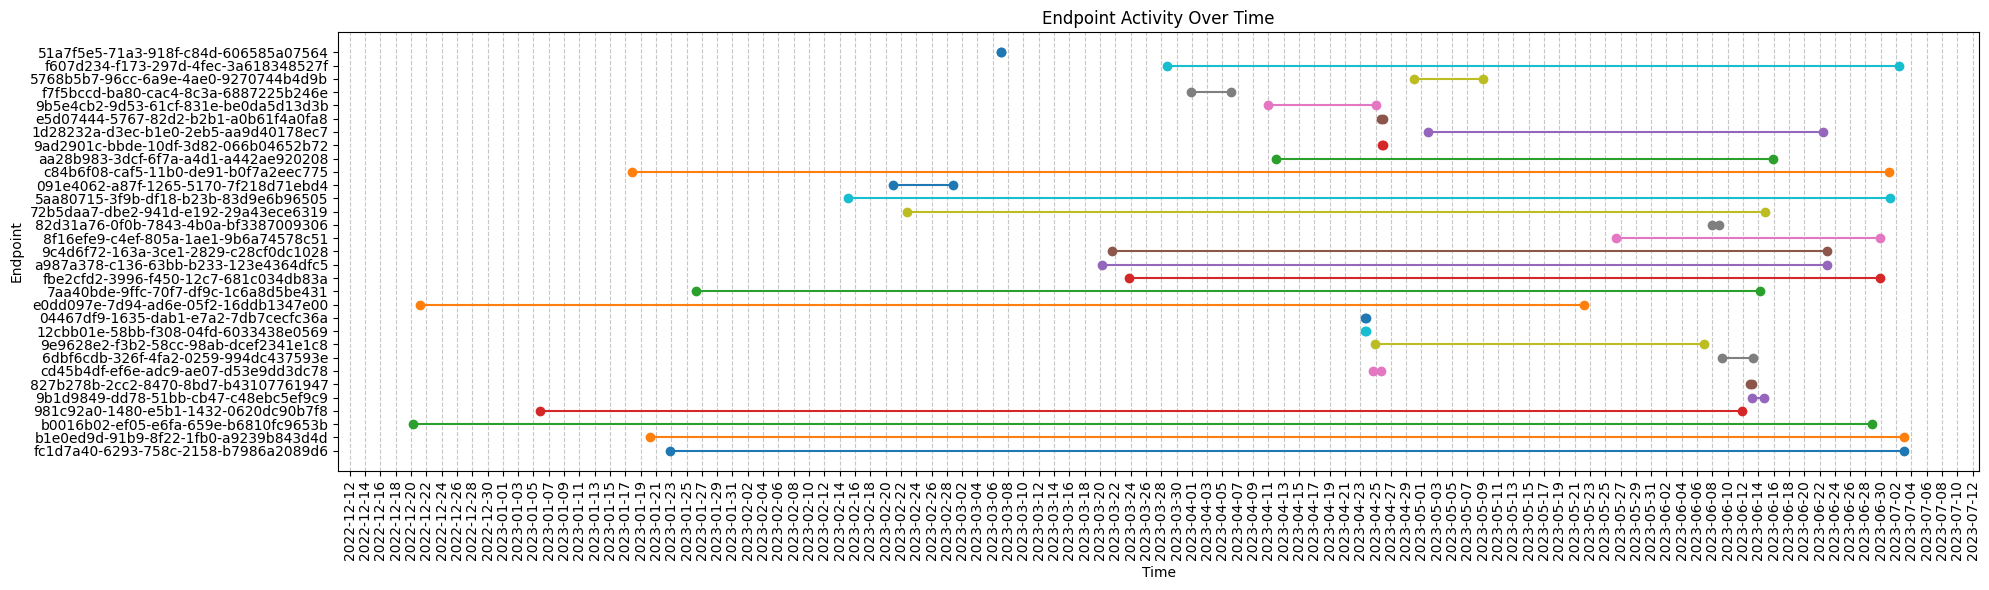

In [46]:
import matplotlib.dates as mdates

# Filtrare gli endpoint con un numero di invocazioni maggiore di 1
filtered_df = df[df['n_tasks'] > 1000]

# Convertire start_date e end_date in formato datetime
filtered_df['first_function_call'] = pd.to_datetime(filtered_df['first_function_call'])
filtered_df['last_function_call'] = pd.to_datetime(filtered_df['last_function_call'])

# Creare la figura e gli assi
fig, ax = plt.subplots(figsize=(20, 6))

# Iterare per ogni riga e tracciare i segmenti
for i, row in filtered_df.iterrows():
    ax.plot([row['first_function_call'], row['last_function_call']], [row['endpoint_uuid'], row['endpoint_uuid']], marker='o', label=row['endpoint_uuid'])

# Configurare l'asse X per il tempo
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Etichetta ogni 2 giorni
plt.xticks(rotation=90)

# Aggiungere etichette e titolo
ax.set_xlabel("Time")
ax.set_ylabel("Endpoint")
ax.set_title("Endpoint Activity Over Time")

# Aggiungere la griglia
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrare il grafico
plt.tight_layout()
plt.show()


# Aggregated endpoints

In [47]:
dataset_30 = load_dataset("anastasiafrosted/globus_30", download_mode="force_redownload")
dataset_60 = load_dataset("anastasiafrosted/globus_60", download_mode="force_redownload")
dataset_300 = load_dataset("anastasiafrosted/globus_300", download_mode="force_redownload")

df_30 = pd.DataFrame(dataset_30['train'])
df_60 = pd.DataFrame(dataset_60['train'])
df_300 = pd.DataFrame(dataset_300['train'])

# Ensure the `timestamp` column is in datetime format
df_30['timestamp'] = pd.to_datetime(df_30['timestamp'])
df_60['timestamp'] = pd.to_datetime(df_60['timestamp'])
df_300['timestamp'] = pd.to_datetime(df_300['timestamp'])

train-00000-of-00001.parquet:   0%|          | 0.00/4.80M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/289311 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.12M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/176523 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/37667 [00:00<?, ? examples/s]

In [48]:
# Create a function to plot the data
def plot_data(data, x_col, y_col, title, ax, granularity, hourly_granularity):
    ax.plot(data[x_col], data[y_col], marker='o', linestyle='-', label=granularity, linewidth=2)
    ax.set_title(title, fontsize=14, fontweight="bold", color="darkblue")
    ax.set_xlabel("Timestamp", fontsize=12)
    ax.set_ylabel("Number of Invocations", fontsize=12)
    ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid with dashed lines
    ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels
    ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis label size
    ax.legend(loc="upper right", fontsize=10)  # Add legend

    # Formatting x-axis ticks
    if(hourly_granularity>1):
      ax.xaxis.set_major_locator(mdates.HourLocator(interval=hourly_granularity))  # Show ticks every hour
      ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format x-axis labels

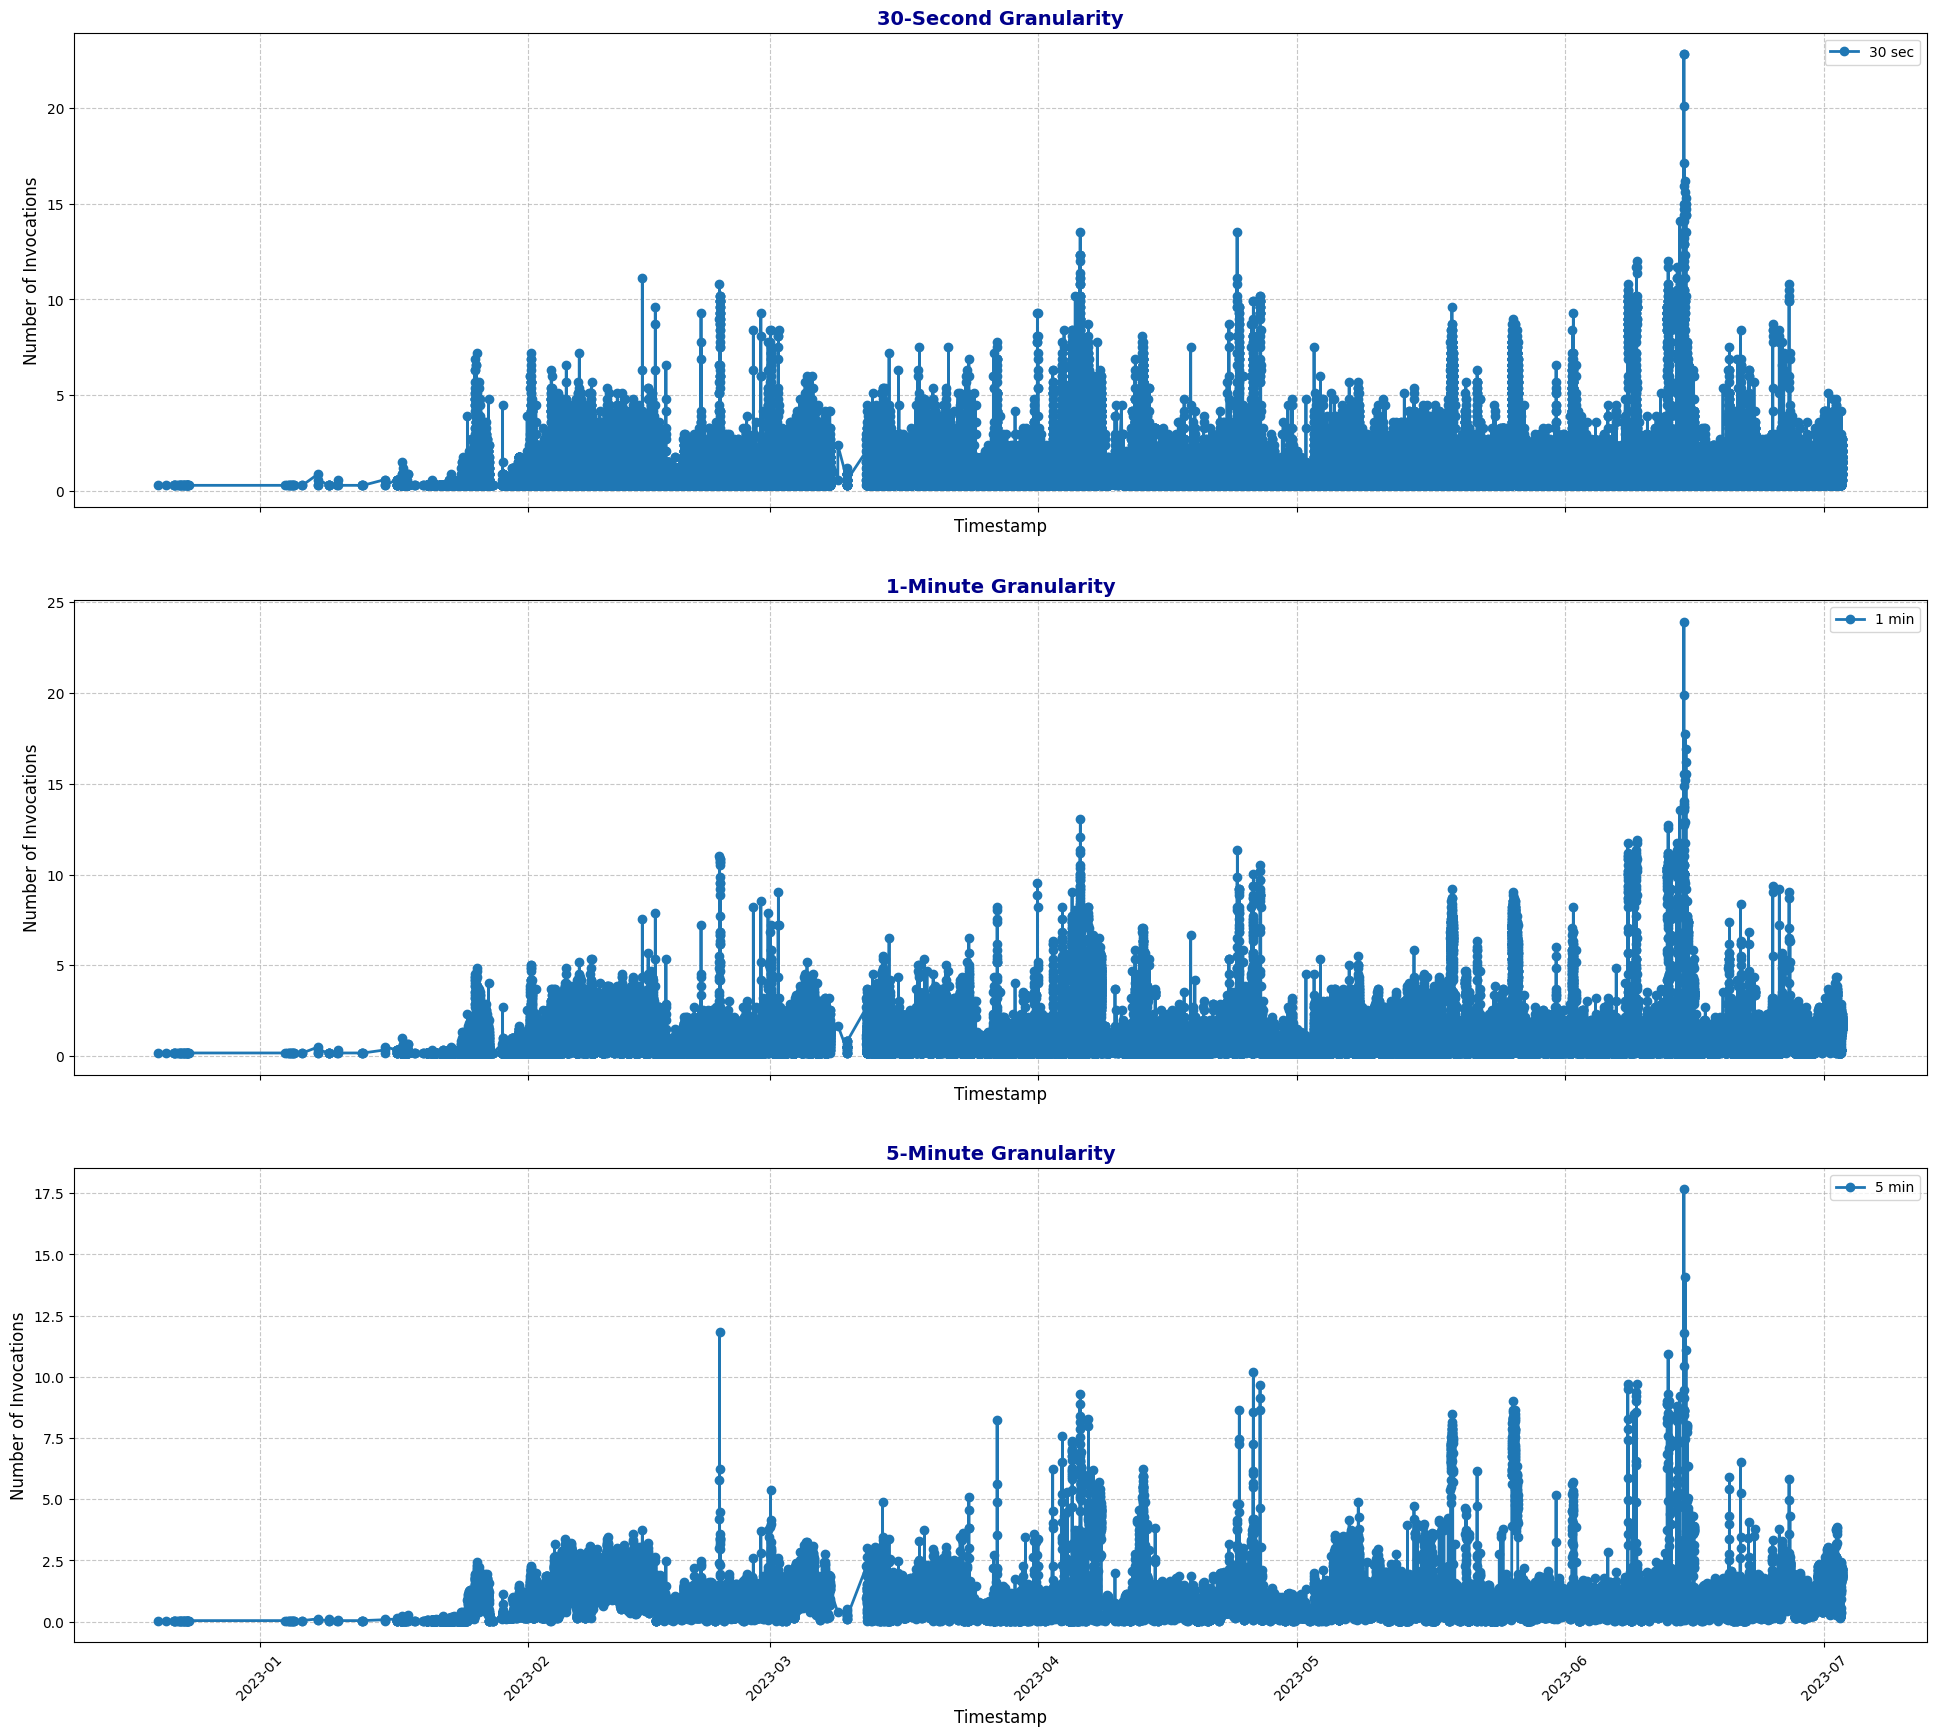

In [49]:
# Plot the data for three granularities
fig, axes = plt.subplots(3, 1, figsize=(20, 18), sharex=True)

# 1. 30-second granularity
plot_data(df_30, "timestamp", "n_invocations", "30-Second Granularity", axes[0], "30 sec", 1/120)

# 2. 1-minute granularity
plot_data(df_60, "timestamp", "n_invocations", "1-Minute Granularity", axes[1], "1 min", 1/60)

# 3. 5-minute granularity
plot_data(df_300, "timestamp", "n_invocations", "5-Minute Granularity", axes[2], "5 min", 5/60)

# Adjust layout and show the plots
plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

# Function invocations (tasks) overtime of top 5 endpoints

In [50]:
# Create a function to plot the data using an Axes object
def plot_data(data, x_col, y_col, ax, title, label, hour_granularity):
    ax.plot(data.index, data[y_col], marker='o', linestyle='-', label=label, linewidth=2)
    ax.set_title(
        "Invocations(n_tasks) rate of "+title+", over a "+str(hour_granularity)+"-hour period",
        fontsize=14,
        fontweight="bold",
        color="darkblue"
    )
    ax.set_xlabel("Timestamp", fontsize=12)
    ax.set_ylabel("Invocations rate", fontsize=12)
    ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid with dashed lines
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    ax.tick_params(axis='y', rotation=0)  # Adjust y-axis label size
    ax.legend(loc="upper right", fontsize=10)  # Add legend

    # Formatting x-axis ticks
    if(hourly_granularity>1):
      ax.xaxis.set_major_locator(mdates.HourLocator(interval=hour_granularity))  # Show ticks every hour
      ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format x-axis labels

#### per 60 seconds

In [51]:
e0 = load_dataset("anastasiafrosted/endpoint0_60", download_mode="force_redownload")
e1 = load_dataset("anastasiafrosted/endpoint1_60", download_mode="force_redownload")
e2 = load_dataset("anastasiafrosted/endpoint2_60", download_mode="force_redownload")
e3 = load_dataset("anastasiafrosted/endpoint3_60", download_mode="force_redownload")
e4 = load_dataset("anastasiafrosted/endpoint4_60", download_mode="force_redownload")

df_e0 = pd.DataFrame(e0['train'])
df_e1 = pd.DataFrame(e1['train'])
df_e2 = pd.DataFrame(e2['train'])
df_e3 = pd.DataFrame(e3['train'])
df_e4 = pd.DataFrame(e4['train'])

# Ensure the `timestamp` column is in datetime format
df_e0['timestamp'] = pd.to_datetime(df_e0['timestamp'])
df_e0 = df_e0.set_index('timestamp')
df_e1['timestamp'] = pd.to_datetime(df_e1['timestamp'])
df_e1 = df_e1.set_index('timestamp')
df_e2['timestamp'] = pd.to_datetime(df_e2['timestamp'])
df_e2 = df_e2.set_index('timestamp')
df_e3['timestamp'] = pd.to_datetime(df_e3['timestamp'])
df_e3 = df_e3.set_index('timestamp')
df_e4['timestamp'] = pd.to_datetime(df_e4['timestamp'])
df_e4 = df_e4.set_index('timestamp')

train-00000-of-00001.parquet:   0%|          | 0.00/1.83M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/124160 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/103531 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/154k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4193 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/244k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21049 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/7.82k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/124 [00:00<?, ? examples/s]

In [52]:
# Define hourly granularity and calculate the resample interval
hourly_granularity = 1/(60)

data_e0_24h = df_e0.asfreq('60s')
data_e0_24h = data_e0_24h.fillna(0)

data_e1_24h = df_e1.asfreq('60s')
data_e1_24h = data_e1_24h.fillna(0)

data_e2_24h = df_e2.asfreq('60s')
data_e2_24h = data_e2_24h.fillna(0)

data_e3_24h = df_e3.asfreq('60s')
data_e3_24h = data_e3_24h.fillna(0)

data_e4_24h = df_e4.asfreq('60s')
data_e4_24h = data_e4_24h.fillna(0)

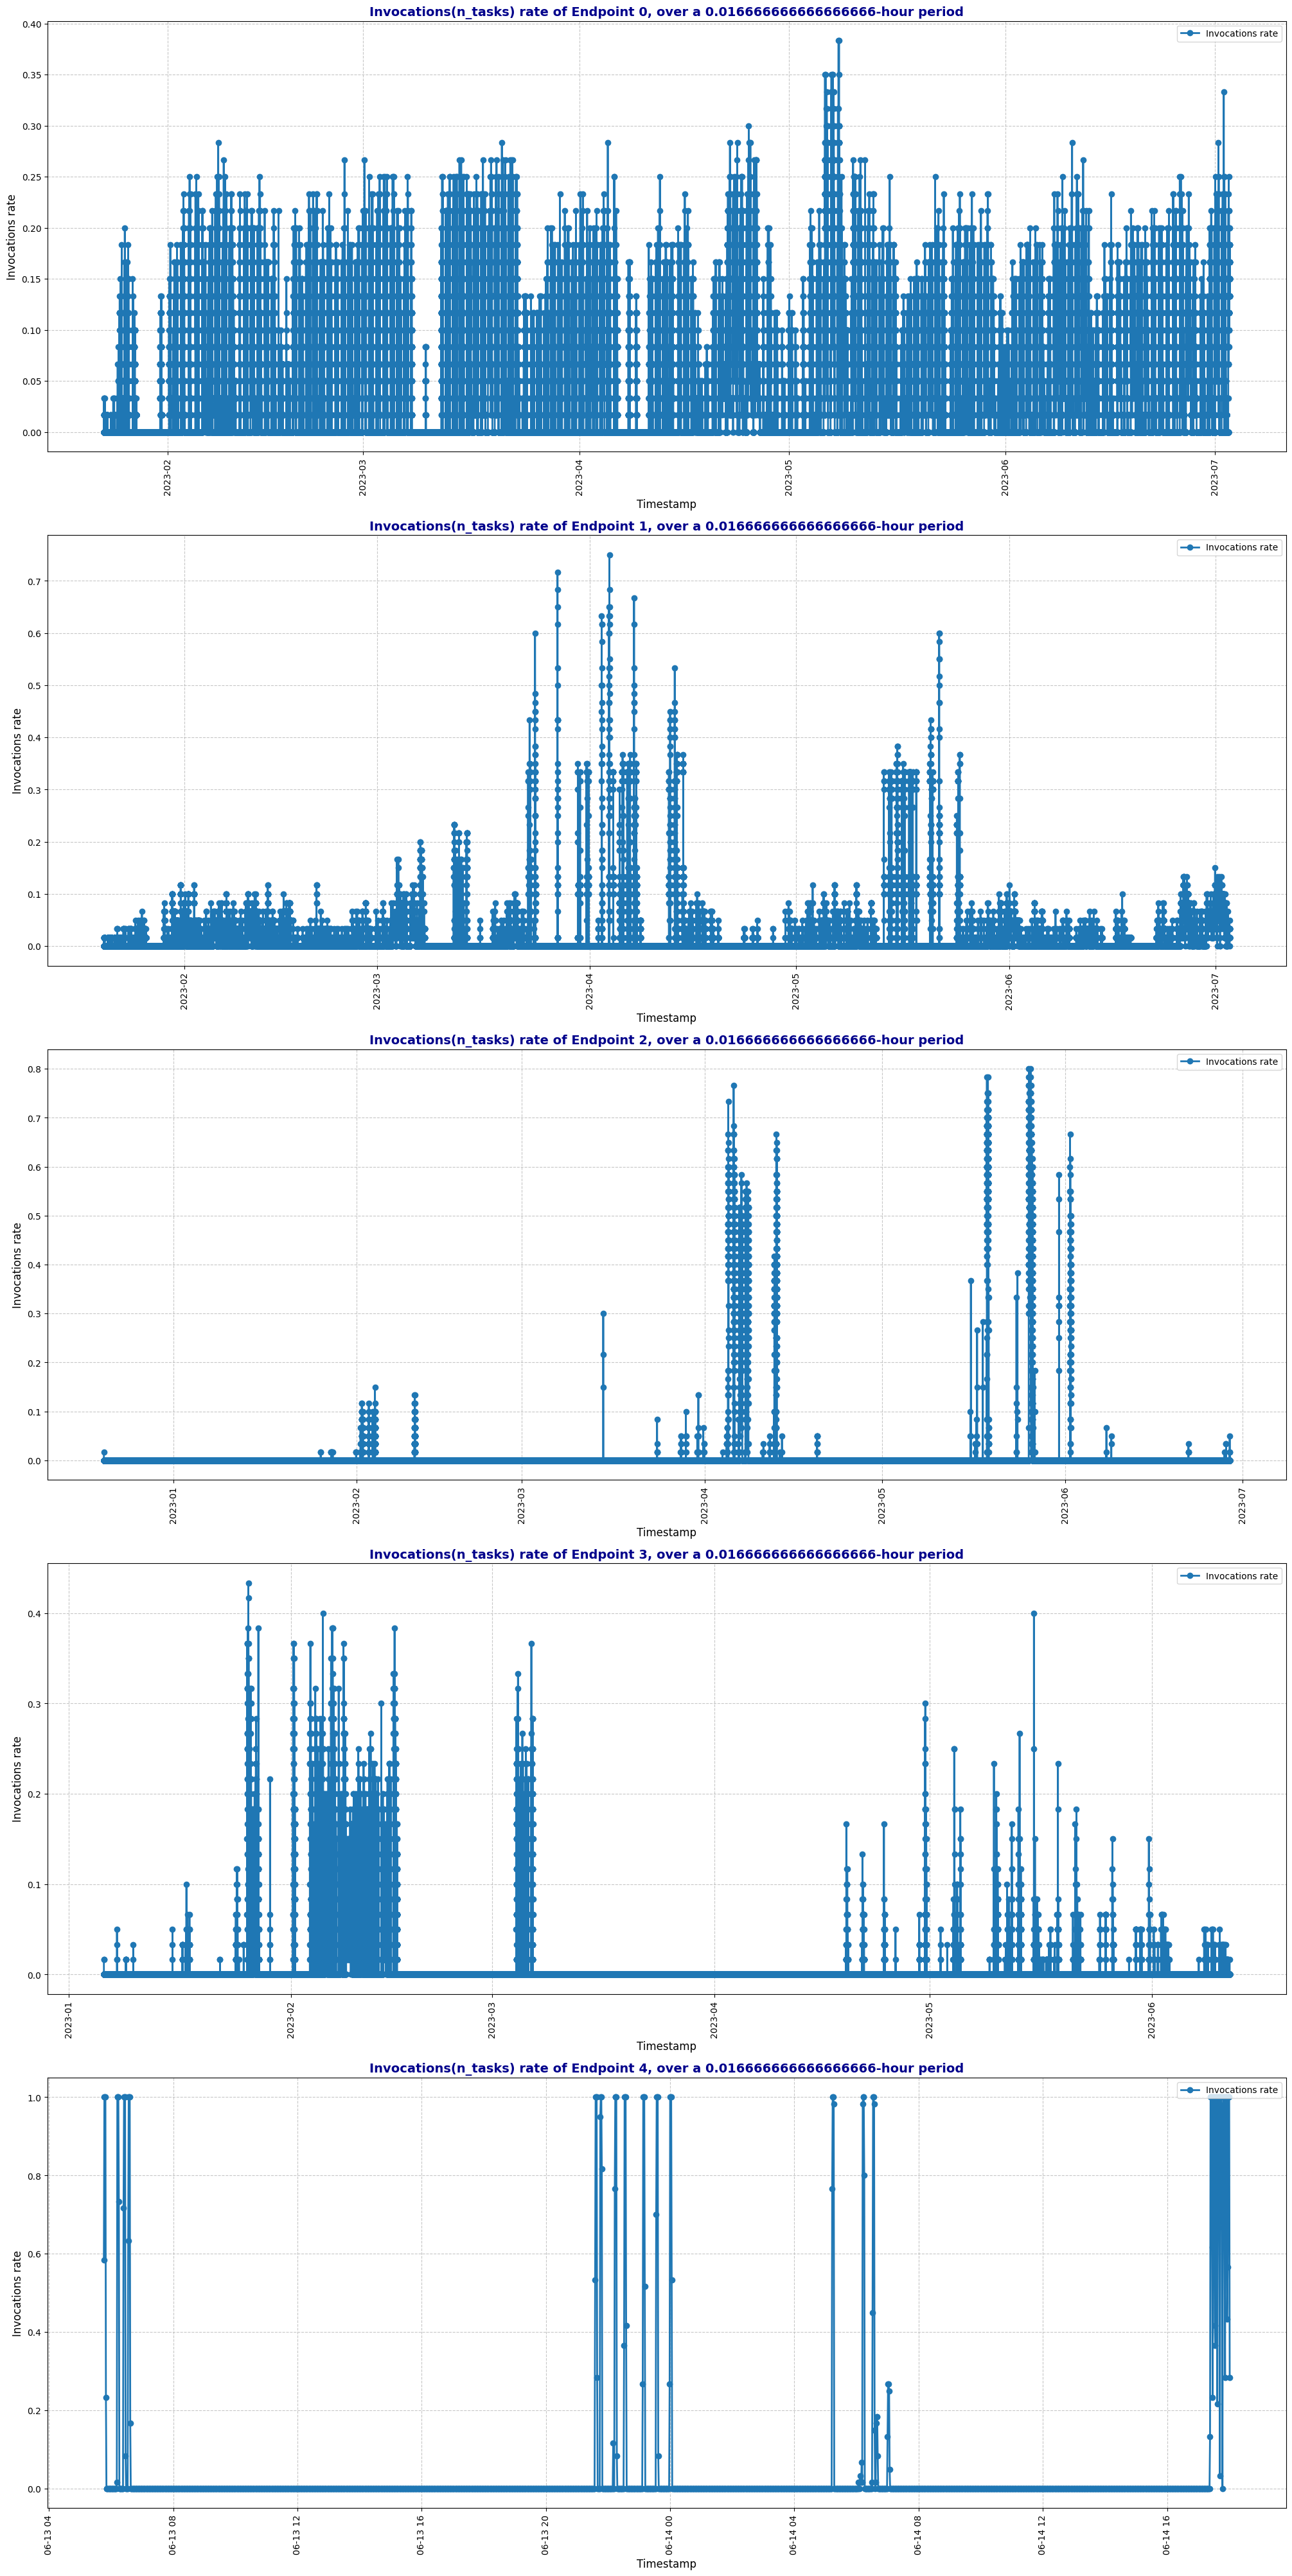

In [53]:
import matplotlib.pyplot as plt
from datetime import datetime

# List of datasets and their labels
datasets = [
    (data_e0_24h, "Endpoint 0"),
    (data_e1_24h, "Endpoint 1"),
    (data_e2_24h, "Endpoint 2"),
    (data_e3_24h, "Endpoint 3"),
    (data_e4_24h, "Endpoint 4"),
]

# Create subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(20, 8 * len(datasets)), constrained_layout=True)

# Plot each dataset on its corresponding axis
for ax, (data, label) in zip(axes, datasets):
    plot_data(data, "timestamp", "avg_invocations_rate", ax, label, "Invocations rate", hourly_granularity)

# Show the plots
plt.show()

#### per 5 minutes

In [54]:
e0 = load_dataset("anastasiafrosted/endpoint0_300", download_mode="force_redownload")
e1 = load_dataset("anastasiafrosted/endpoint1_300", download_mode="force_redownload")
e2 = load_dataset("anastasiafrosted/endpoint2_300", download_mode="force_redownload")
e3 = load_dataset("anastasiafrosted/endpoint3_300", download_mode="force_redownload")
e4 = load_dataset("anastasiafrosted/endpoint4_300", download_mode="force_redownload")

df_e0 = pd.DataFrame(e0['train'])
df_e1 = pd.DataFrame(e1['train'])
df_e2 = pd.DataFrame(e2['train'])
df_e3 = pd.DataFrame(e3['train'])
df_e4 = pd.DataFrame(e4['train'])

# Ensure the `timestamp` column is in datetime format
df_e0['timestamp'] = pd.to_datetime(df_e0['timestamp'])
df_e0 = df_e0.set_index('timestamp')
df_e1['timestamp'] = pd.to_datetime(df_e1['timestamp'])
df_e1 = df_e1.set_index('timestamp')
df_e2['timestamp'] = pd.to_datetime(df_e2['timestamp'])
df_e2 = df_e2.set_index('timestamp')
df_e3['timestamp'] = pd.to_datetime(df_e3['timestamp'])
df_e3 = df_e3.set_index('timestamp')
df_e4['timestamp'] = pd.to_datetime(df_e4['timestamp'])
df_e4 = df_e4.set_index('timestamp')

train-00000-of-00001.parquet:   0%|          | 0.00/629k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25600 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/327k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/22019 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/953 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5812 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/40 [00:00<?, ? examples/s]

In [55]:
# Define hourly granularity and calculate the resample interval
hourly_granularity = 5/(60)

data_e0_24h = df_e0.asfreq('300s')
data_e0_24h = data_e0_24h.fillna(0)

data_e1_24h = df_e1.asfreq('300s')
data_e1_24h = data_e1_24h.fillna(0)

data_e2_24h = df_e2.asfreq('300s')
data_e2_24h = data_e2_24h.fillna(0)

data_e3_24h = df_e3.asfreq('300s')
data_e3_24h = data_e3_24h.fillna(0)

data_e4_24h = df_e4.asfreq('300s')
data_e4_24h = data_e4_24h.fillna(0)

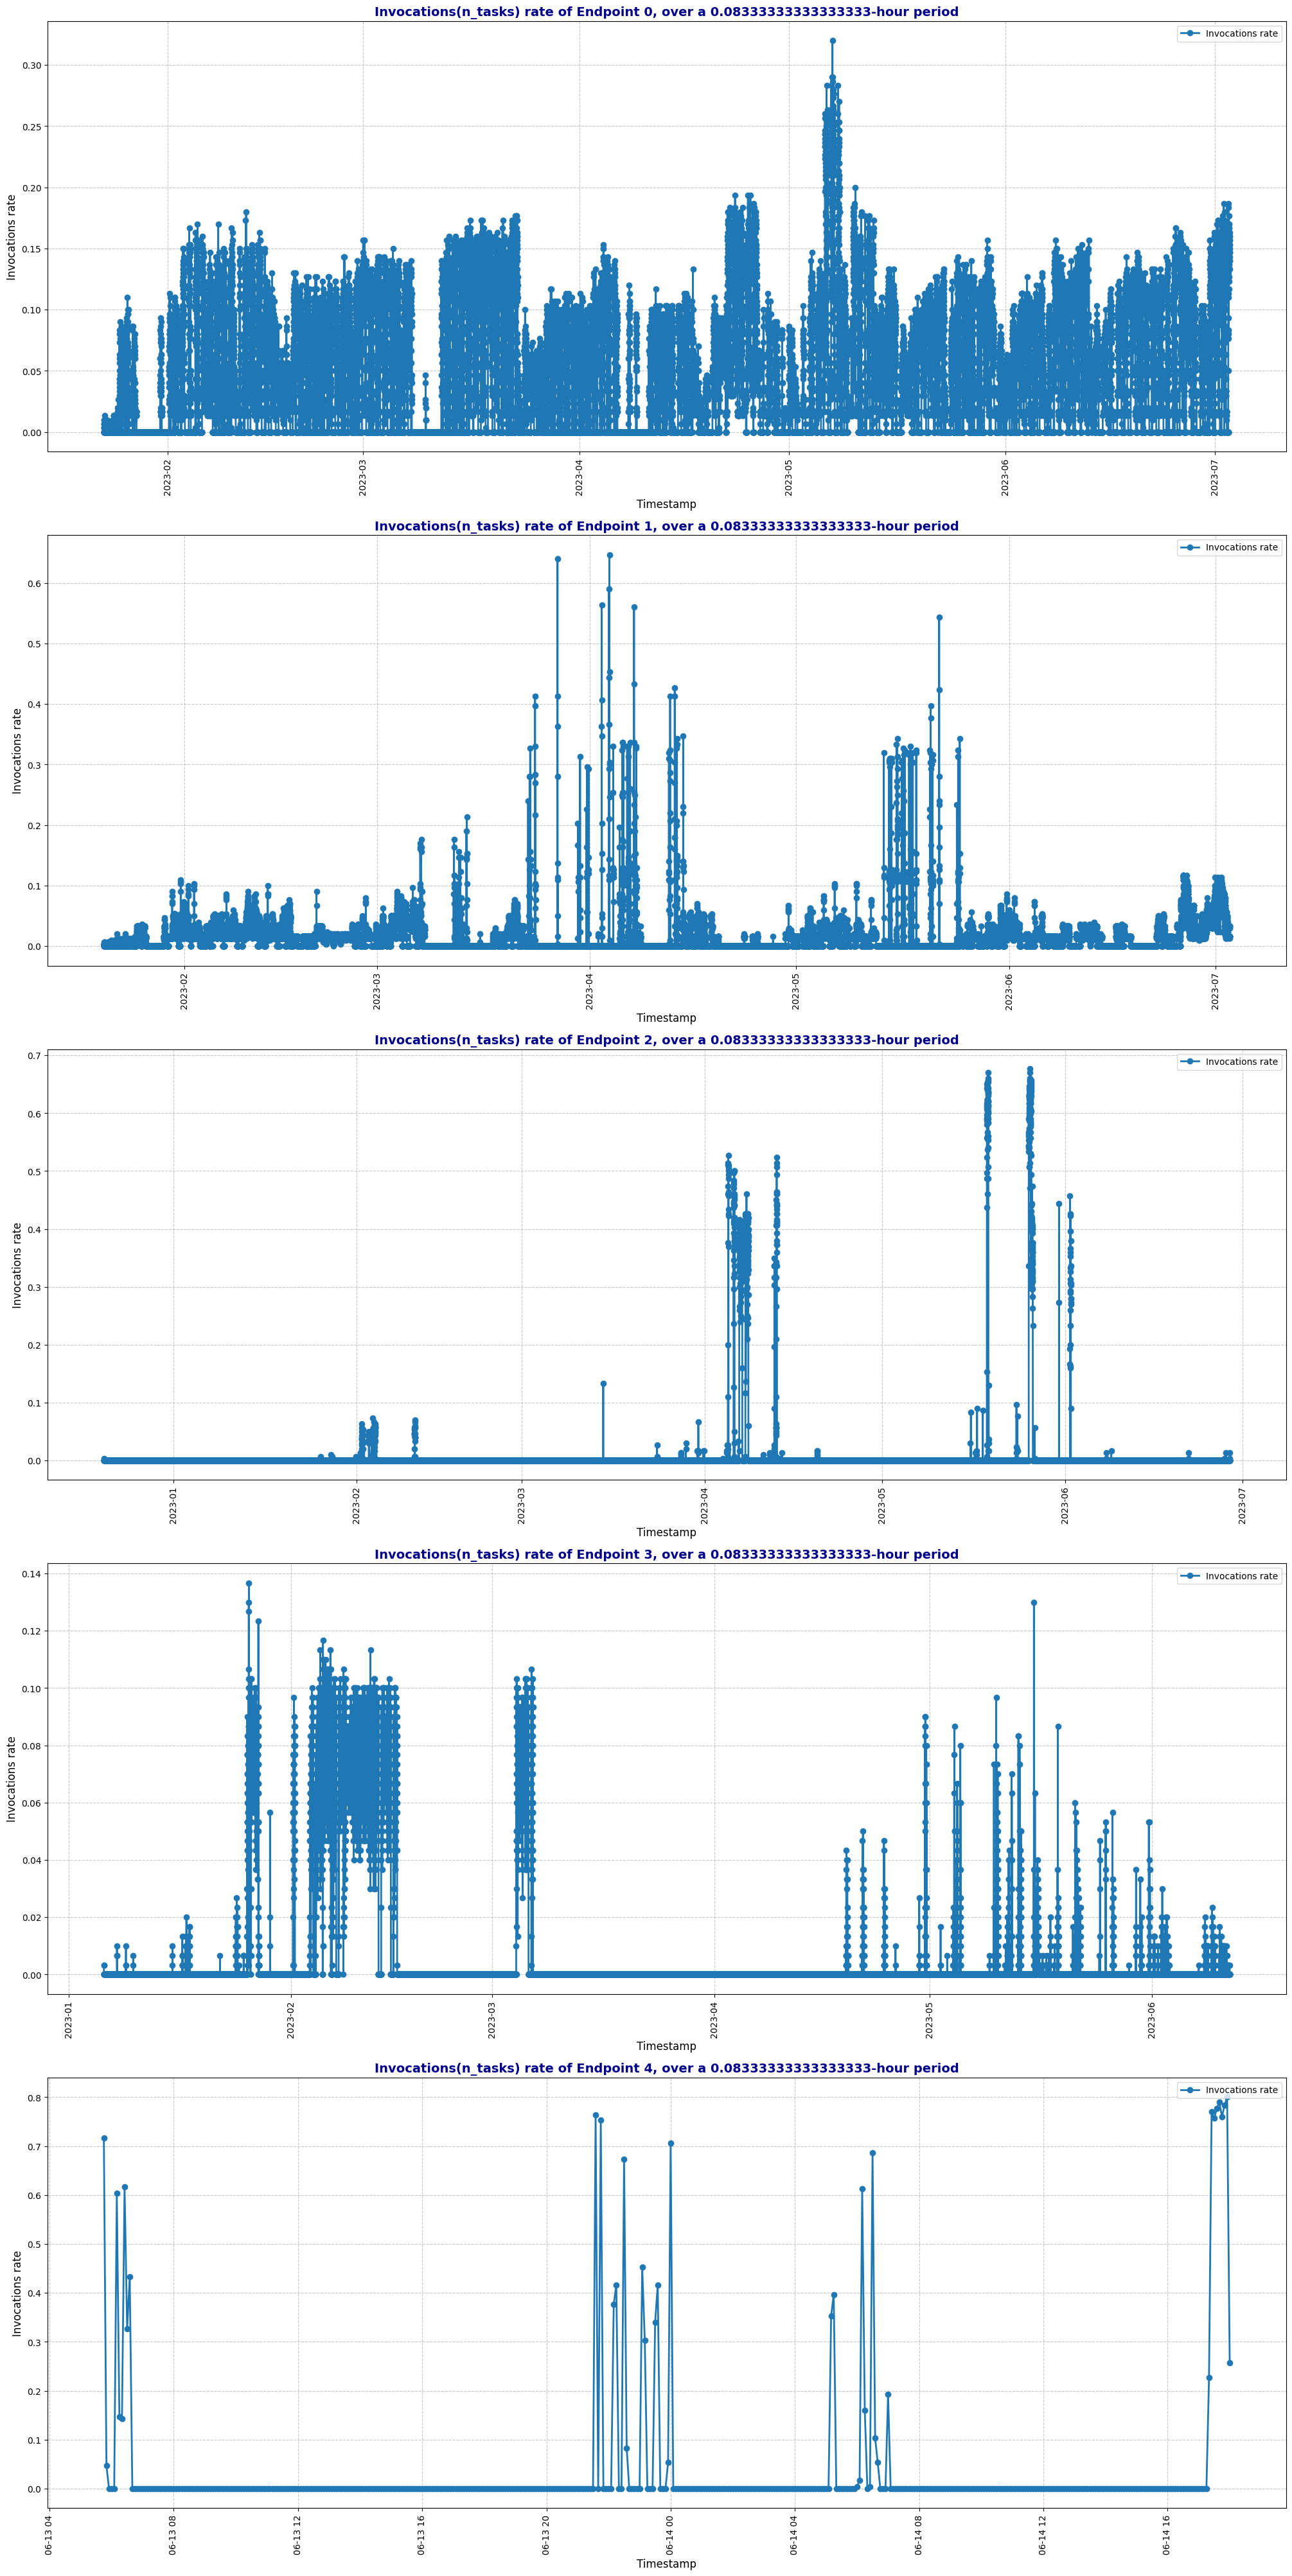

In [56]:
import matplotlib.pyplot as plt
from datetime import datetime

# List of datasets and their labels
datasets = [
    (data_e0_24h, "Endpoint 0"),
    (data_e1_24h, "Endpoint 1"),
    (data_e2_24h, "Endpoint 2"),
    (data_e3_24h, "Endpoint 3"),
    (data_e4_24h, "Endpoint 4"),
]

# Create subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(20, 8 * len(datasets)), constrained_layout=True)

# Plot each dataset on its corresponding axis
for ax, (data, label) in zip(axes, datasets):
    plot_data(data, "timestamp", "avg_invocations_rate", ax, label, "Invocations rate", hourly_granularity)

# Show the plots
plt.show()

#### per 1 hour

In [57]:
e0 = load_dataset("anastasiafrosted/endpoint0_3600", download_mode="force_redownload")
e1 = load_dataset("anastasiafrosted/endpoint1_3600", download_mode="force_redownload")
e2 = load_dataset("anastasiafrosted/endpoint2_3600", download_mode="force_redownload")
e3 = load_dataset("anastasiafrosted/endpoint3_3600", download_mode="force_redownload")
e4 = load_dataset("anastasiafrosted/endpoint4_3600", download_mode="force_redownload")

df_e0 = pd.DataFrame(e0['train'])
df_e1 = pd.DataFrame(e1['train'])
df_e2 = pd.DataFrame(e2['train'])
df_e3 = pd.DataFrame(e3['train'])
df_e4 = pd.DataFrame(e4['train'])

# Ensure the `timestamp` column is in datetime format
df_e0['timestamp'] = pd.to_datetime(df_e0['timestamp'])
df_e0 = df_e0.set_index('timestamp')
df_e1['timestamp'] = pd.to_datetime(df_e1['timestamp'])
df_e1 = df_e1.set_index('timestamp')
df_e2['timestamp'] = pd.to_datetime(df_e2['timestamp'])
df_e2 = df_e2.set_index('timestamp')
df_e3['timestamp'] = pd.to_datetime(df_e3['timestamp'])
df_e3 = df_e3.set_index('timestamp')
df_e4['timestamp'] = pd.to_datetime(df_e4['timestamp'])
df_e4 = df_e4.set_index('timestamp')

train-00000-of-00001.parquet:   0%|          | 0.00/124k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2429 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/72.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2083 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/142 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/649 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11 [00:00<?, ? examples/s]

In [58]:
# Define hourly granularity and calculate the resample interval
hourly_granularity = 1

data_e0_24h = df_e0.asfreq('3600s')
data_e0_24h = data_e0_24h.fillna(0)

data_e1_24h = df_e1.asfreq('3600s')
data_e1_24h = data_e1_24h.fillna(0)

data_e2_24h = df_e2.asfreq('3600s')
data_e2_24h = data_e2_24h.fillna(0)

data_e3_24h = df_e3.asfreq('3600s')
data_e3_24h = data_e3_24h.fillna(0)

data_e4_24h = df_e4.asfreq('3600s')
data_e4_24h = data_e4_24h.fillna(0)

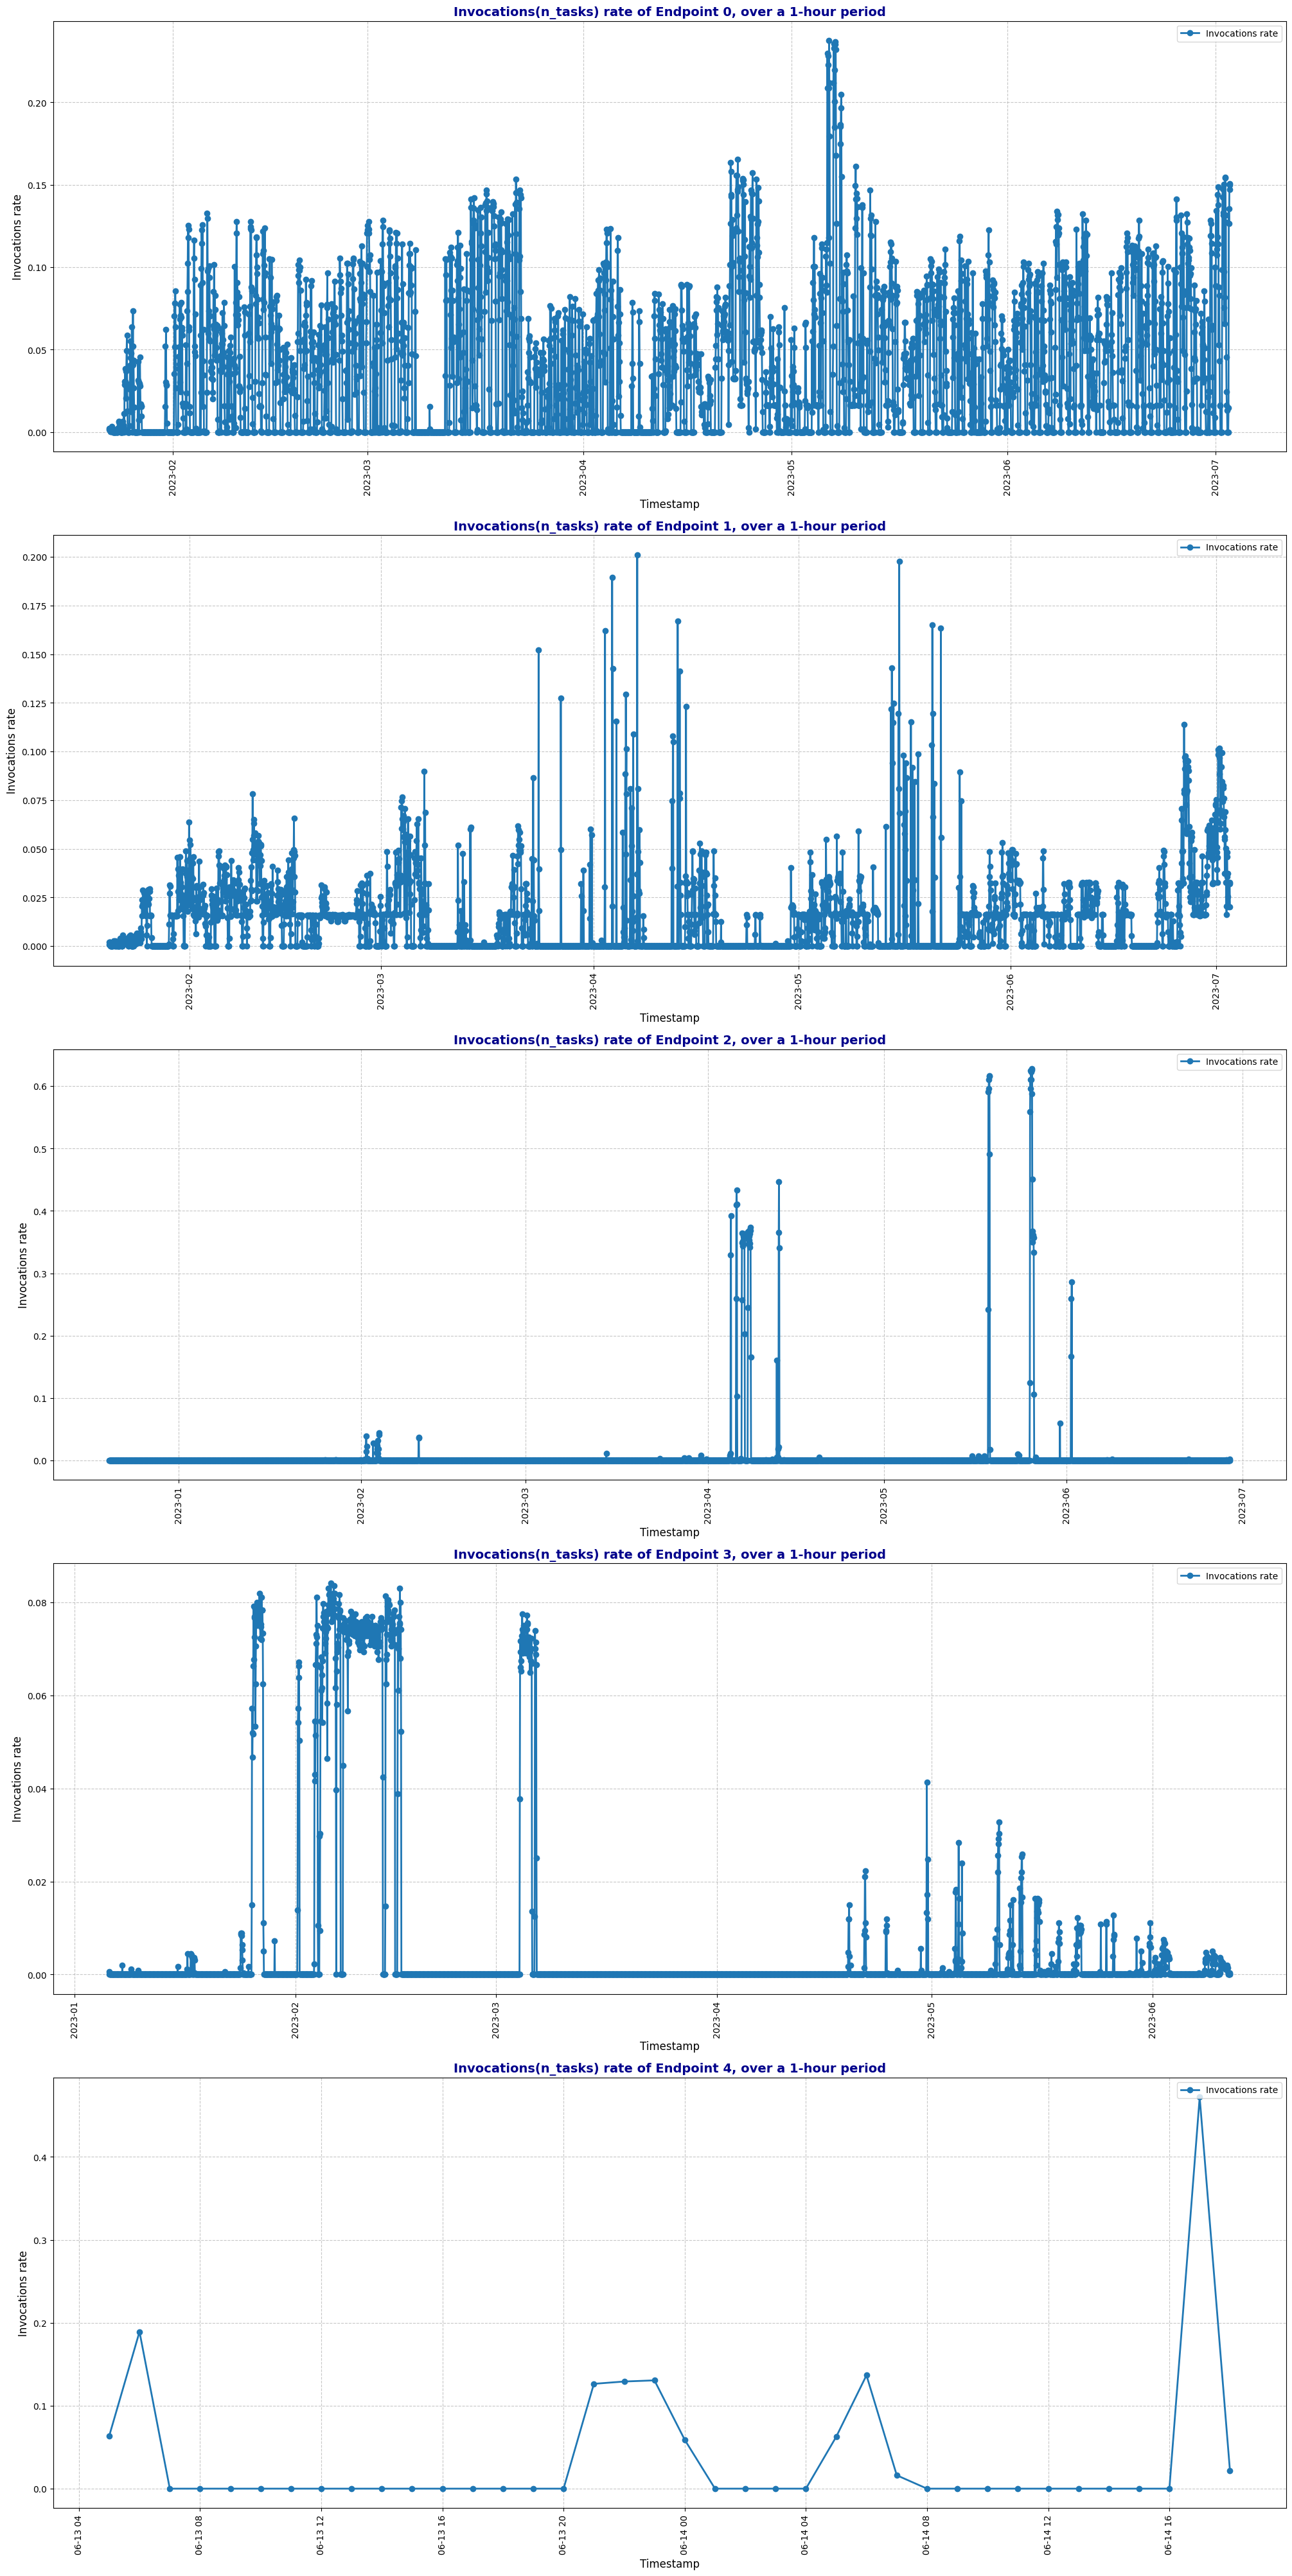

In [59]:
import matplotlib.pyplot as plt
from datetime import datetime

# List of datasets and their labels
datasets = [
    (data_e0_24h, "Endpoint 0"),
    (data_e1_24h, "Endpoint 1"),
    (data_e2_24h, "Endpoint 2"),
    (data_e3_24h, "Endpoint 3"),
    (data_e4_24h, "Endpoint 4"),
]

# Create subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(20, 8 * len(datasets)), constrained_layout=True)

# Plot each dataset on its corresponding axis
for ax, (data, label) in zip(axes, datasets):
    plot_data(data, "timestamp", "avg_invocations_rate", ax, label, "Invocations rate", hourly_granularity)

# Show the plots
plt.show()

#### per day

In [60]:
e0 = load_dataset("anastasiafrosted/endpoint0_86400", download_mode="force_redownload")
e1 = load_dataset("anastasiafrosted/endpoint1_86400", download_mode="force_redownload")
e2 = load_dataset("anastasiafrosted/endpoint2_86400", download_mode="force_redownload")
e3 = load_dataset("anastasiafrosted/endpoint3_86400", download_mode="force_redownload")
e4 = load_dataset("anastasiafrosted/endpoint4_86400", download_mode="force_redownload")

df_e0 = pd.DataFrame(e0['train'])
df_e1 = pd.DataFrame(e1['train'])
df_e2 = pd.DataFrame(e2['train'])
df_e3 = pd.DataFrame(e3['train'])
df_e4 = pd.DataFrame(e4['train'])

# Ensure the `timestamp` column is in datetime format
df_e0['timestamp'] = pd.to_datetime(df_e0['timestamp'])
df_e0 = df_e0.set_index('timestamp')
df_e1['timestamp'] = pd.to_datetime(df_e1['timestamp'])
df_e1 = df_e1.set_index('timestamp')
df_e2['timestamp'] = pd.to_datetime(df_e2['timestamp'])
df_e2 = df_e2.set_index('timestamp')
df_e3['timestamp'] = pd.to_datetime(df_e3['timestamp'])
df_e3 = df_e3.set_index('timestamp')
df_e4['timestamp'] = pd.to_datetime(df_e4['timestamp'])
df_e4 = df_e4.set_index('timestamp')

README.md:   0%|          | 0.00/843 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/157 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/843 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/138 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/839 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/40 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/839 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/8.01k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/66 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/836 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2 [00:00<?, ? examples/s]

In [61]:
# Define hourly granularity and calculate the resample interval
hourly_granularity = 24

data_e0_24h = df_e0.asfreq('86400s')
data_e0_24h = data_e0_24h.fillna(0)

data_e1_24h = df_e1.asfreq('86400s')
data_e1_24h = data_e1_24h.fillna(0)

data_e2_24h = df_e2.asfreq('86400s')
data_e2_24h = data_e2_24h.fillna(0)

data_e3_24h = df_e3.asfreq('86400s')
data_e3_24h = data_e3_24h.fillna(0)

data_e4_24h = df_e4.asfreq('86400s')
data_e4_24h = data_e4_24h.fillna(0)

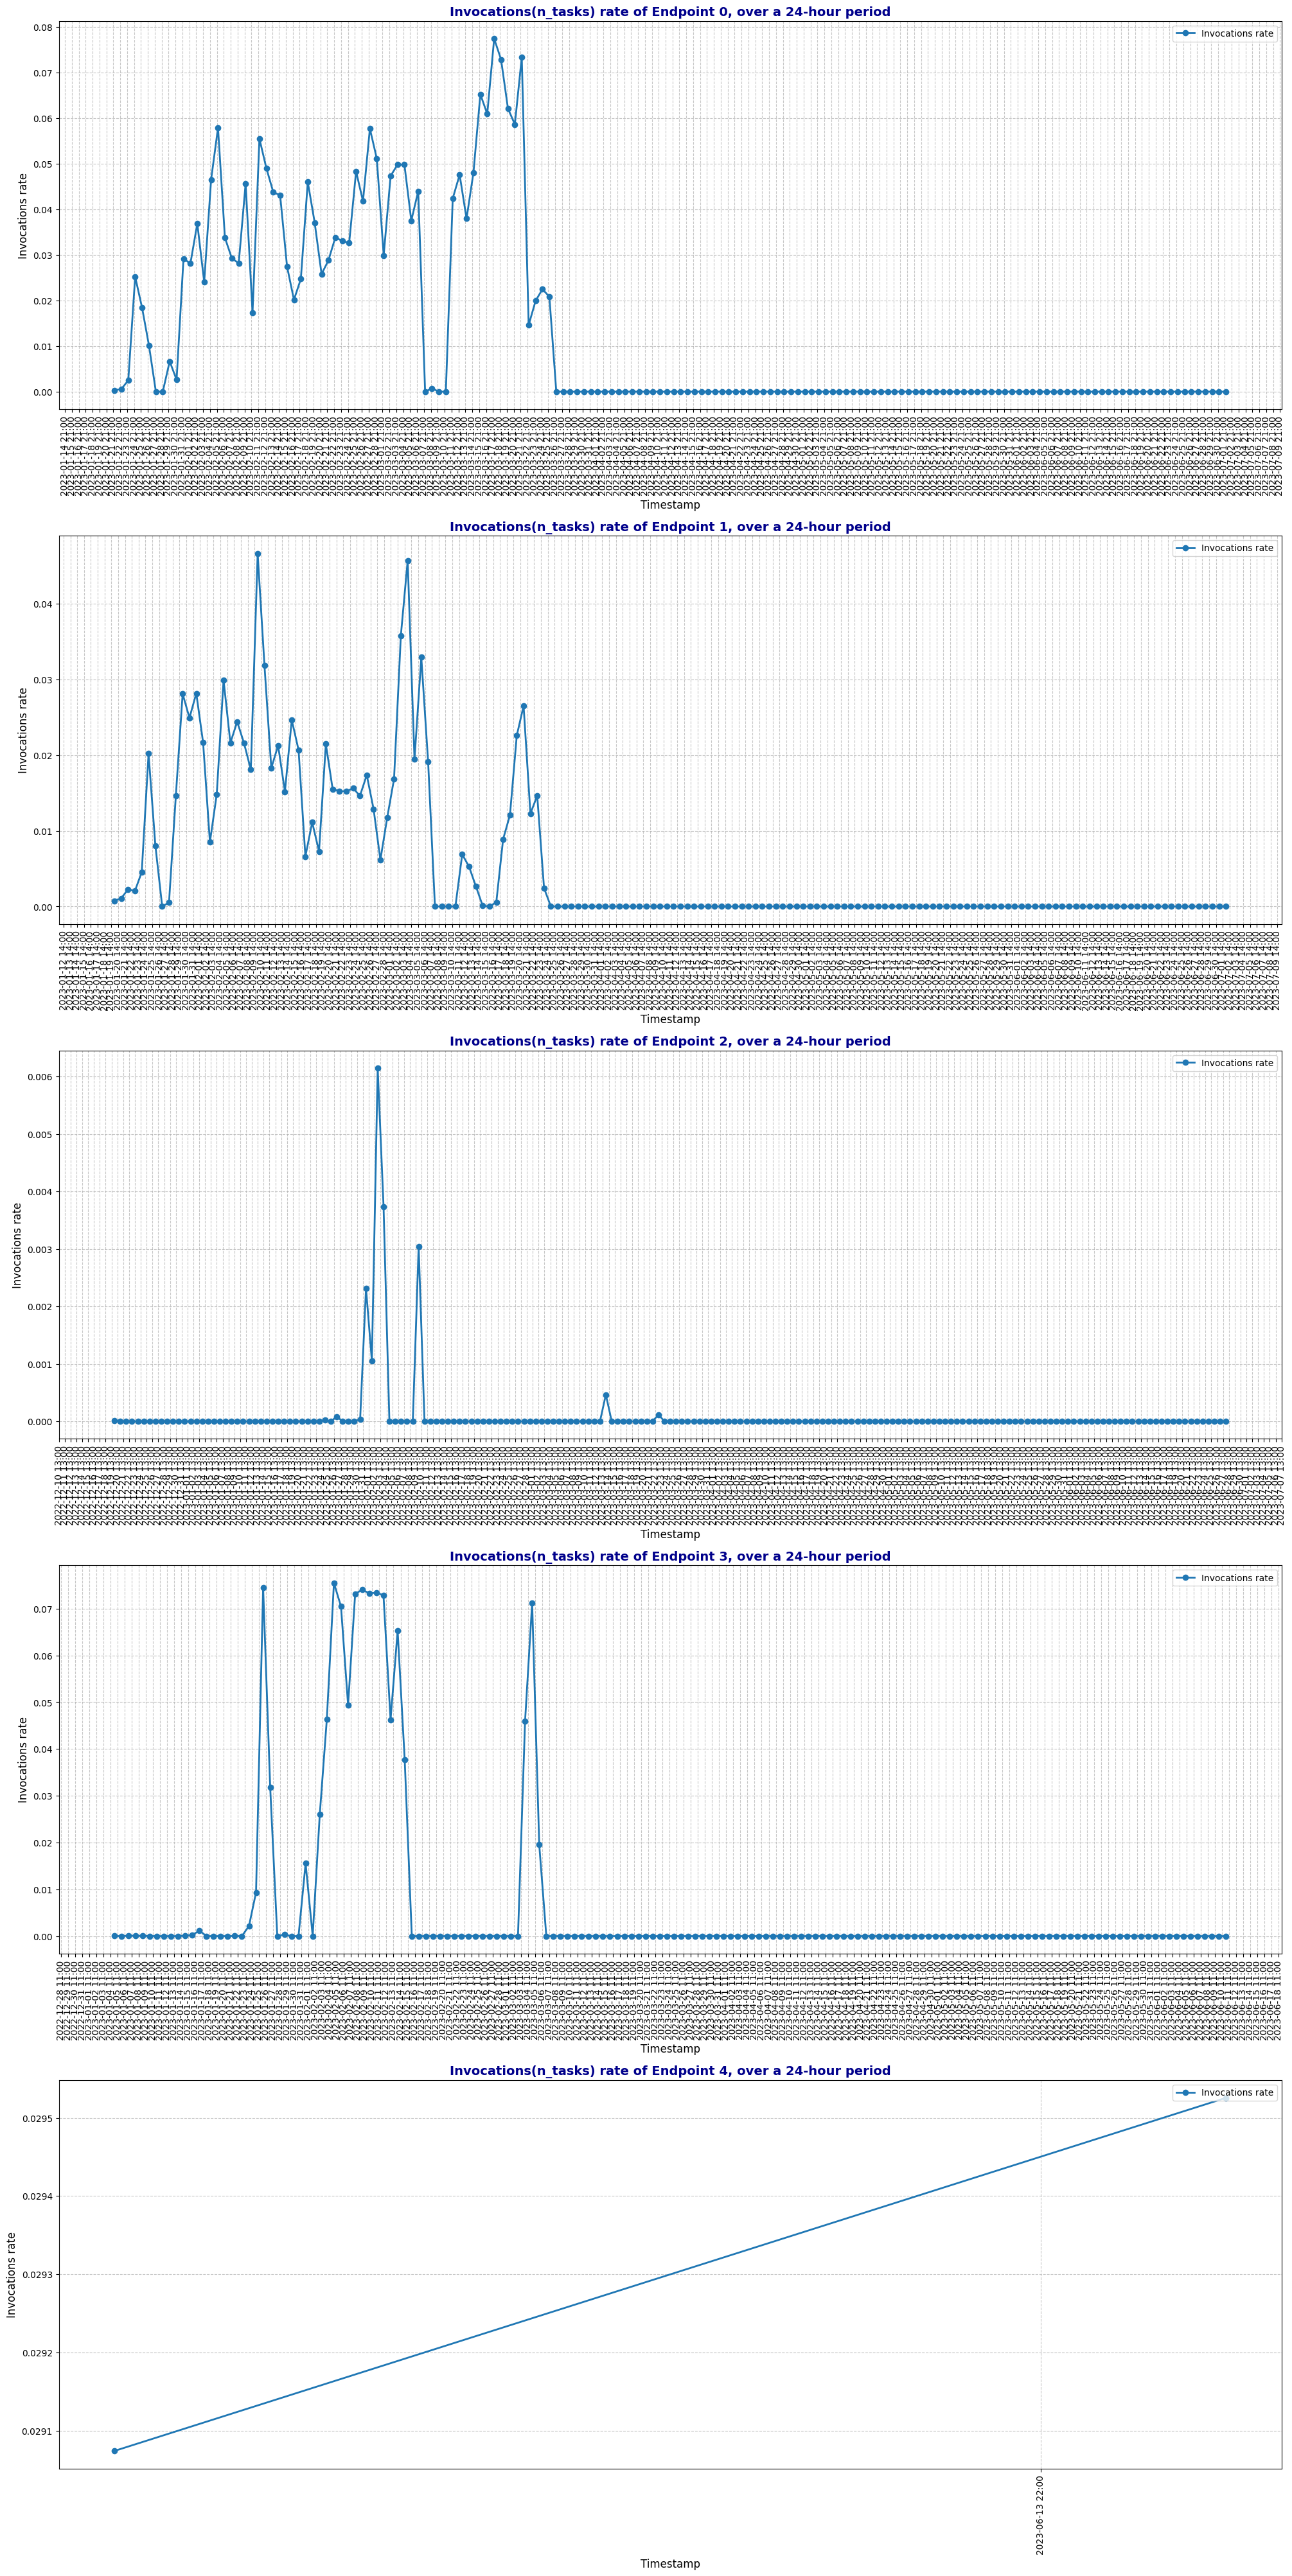

In [62]:
import matplotlib.pyplot as plt
from datetime import datetime

# List of datasets and their labels
datasets = [
    (data_e0_24h, "Endpoint 0"),
    (data_e1_24h, "Endpoint 1"),
    (data_e2_24h, "Endpoint 2"),
    (data_e3_24h, "Endpoint 3"),
    (data_e4_24h, "Endpoint 4"),
]

# Create subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(20, 8 * len(datasets)), constrained_layout=True)

# Plot each dataset on its corresponding axis
for ax, (data, label) in zip(axes, datasets):
    plot_data(data, "timestamp", "avg_invocations_rate", ax, label, "Invocations rate", hourly_granularity)

# Show the plots
plt.show()

In [63]:
print(data_e4_24h)

                     n_invocations  avg_loc  avg_cyc_complexity  \
timestamp                                                         
2023-06-13 02:00:00           2512      2.0                 1.0   
2023-06-14 02:00:00           2551      2.0                 1.0   

                     avg_num_of_imports  avg_argument_size  \
timestamp                                                    
2023-06-13 02:00:00                 0.0          46.000000   
2023-06-14 02:00:00                 0.0          45.981184   

                     e_type_LSFProvider  e_type_CobaltProvider  \
timestamp                                                        
2023-06-13 02:00:00                   0                      0   
2023-06-14 02:00:00                   0                      0   

                     e_type_PBSProProvider  e_type_LocalProvider  \
timestamp                                                          
2023-06-13 02:00:00                      0                     1   
2023-06-14 02